<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_5_4_To%CC%81picos_complementares_Tratamento_de_dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive/cursoML", DRIVE_DIRECTORY)

---

In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Tratamento de dados desbalanceados

### Base de dados cobertura vegetal

Neste exercício você vai mais uma vez utilizar a base de dados cobertura vegetal.

Carregue o arquivo csv salvo na pasta do Drive. Visualize o DataFrame resultante.

In [6]:
base = pd.read_csv(os.path.join(DRIVE_DIRECTORY, "cov_types.csv"))
base.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine


In [7]:
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


As classes estão na coluna `Cover_Type`. Recupere esta coluna e exiba a contagem das classes. Neste caso, você pode utilizar o método `value_counts`.

In [8]:
base["Cover_Type"].value_counts()

,count
Cover_Type,
Lodgepole Pine,4847
Spruce/Fir,3714
Ponderosa Pine,581
Krummholz,362
Douglas-fir,278
Aspen,163
Cottonwood/Willow,55


Visualize a contagem com auxílio da biblioteca Seaborn.

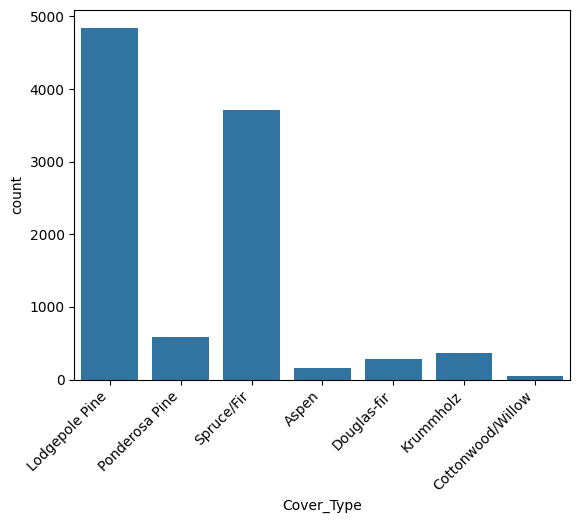

In [10]:
sns.countplot(x="Cover_Type", data=base);
plt.xticks(rotation=45, ha='right');

Agora você pode carregar os mesmos dados, depois de todo o pré-processamento feito na **Parte 1**. Lembre-se de que eles estão armazenados no arquivo `cover_type.pkl` na pasta do Drive.

In [11]:
with open(os.path.join(DRIVE_DIRECTORY, "cover_type.pkl"), "rb") as f:
    (X_train, y_train, X_test, y_test) = pickle.load(f)

### Subamostragem com Tomek Links

Crie uma instância do algoritmo de subamostragem, passando parâmetro `sampling_strategy="all"`. Desta vez, nós vamos fazer a subamostragem somente nos dados de treinamento, mantendo os dados de teste intactos.

In [12]:
tl = TomekLinks(sampling_strategy="all")
X_under, y_under = tl.fit_resample(X_train, y_train)

Utilize `np.unique` para contar as classes em `y_train` (dados originais) e `y_under` (dados subamostrados).

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 129,   39,  211,  275, 3617,  425, 2804]))

In [14]:
np.unique(y_under, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  96,   33,  165,  253, 3333,  378, 2552]))

Agora instancie e treine um algoritmo do tipo RandomForestClassifier, utilizando os dados subamostrados.

In [15]:
tree_classifier = RandomForestClassifier(random_state = 0)
tree_classifier.fit(X_under, y_under)

RandomForestClassifier(random_state=0)

Faça predições utilizando os dados de teste, e exiba a acurácia alcançada.

In [16]:
y_pred = tree_classifier.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.7964

Nos exercícios da **Parte 1.3**, a acurácia foi de 80.64%, então com a técnica de subamostragem, os resultados foram ligeiramente piores.

Agora exiba o reporte de classificação.

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.15      0.25        34
           1       0.91      0.62      0.74        16
           2       0.67      0.39      0.49        67
           3       0.93      0.63      0.75        87
           4       0.81      0.85      0.83      1230
           5       0.72      0.85      0.78       156
           6       0.78      0.78      0.78       910

    accuracy                           0.80      2500
   macro avg       0.81      0.61      0.66      2500
weighted avg       0.80      0.80      0.79      2500



Comparando com a **Parte 1.3**, nós evidenciamos que a técnica melhorou algumas métricas de algumas classes, mas piorou outras.

### Sobreamostragem com SMOTE

Agora, instancie e realize a sobreamostragem com SMOTE. Neste caso, como temos mais de uma classe, utilize `sampling_strategy="auto"`, que equivale a sobreamostrar todas as classes menos a majoritária.

In [20]:
smote = SMOTE(sampling_strategy="auto")
X_over, y_over = smote.fit_resample(X_train, y_train)

Observe a contagem das classes nos dados originais e nos dados sobreamostrados.

In [21]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 129,   39,  211,  275, 3617,  425, 2804]))

In [22]:
np.unique(y_over, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3617, 3617, 3617, 3617, 3617, 3617, 3617]))

Retreine o `RandomForestClassifier` com os dados sobreamostrados.

In [23]:
tree_classifier = RandomForestClassifier(random_state = 0)
tree_classifier.fit(X_over, y_over)


RandomForestClassifier(random_state=0)

Faça predições e calcule a acurácia do modelo.

In [24]:
y_pred = tree_classifier.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8168

Agora, em comparação com a **Parte 1.3**, a acurácia ficou praticamente igual.

Exiba o reporte de classificação.

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        34
           1       0.69      0.69      0.69        16
           2       0.61      0.58      0.60        67
           3       0.85      0.79      0.82        87
           4       0.86      0.83      0.84      1230
           5       0.74      0.87      0.80       156
           6       0.80      0.82      0.81       910

    accuracy                           0.82      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.82      0.82      0.82      2500



Desta vez, a precisão de algumas classes diminuiu, enquanto que o recall aumentou, sobretudo para as classes minoritárias.